# Step1.資料匯入

In [566]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [567]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [568]:
# 觀察資料狀態，合併訓練與測試資料
data = train.append(test)
data.head()

C:\Users\user1\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

In [569]:
# 重新編號索引
data.reset_index(inplace=True, drop=True)

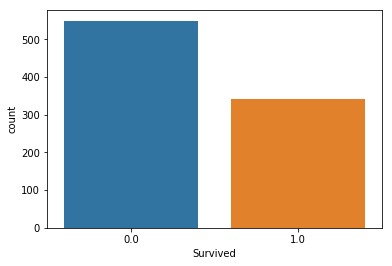

In [570]:
# 觀察死亡率
sns.countplot(data['Survived'])

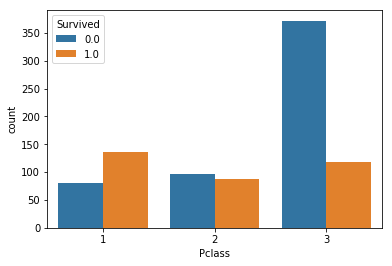

In [571]:
# 艙等與生存率的關係
sns.countplot(data['Pclass'], hue=data['Survived'])

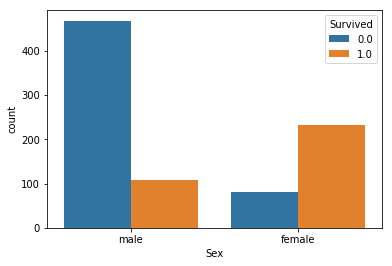

In [572]:
# 性別與生存率的關係
sns.countplot(data['Sex'], hue=data['Survived'])

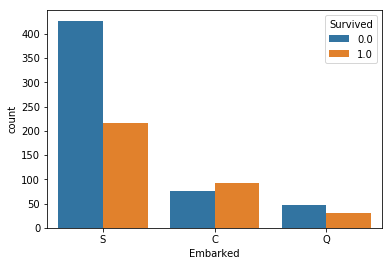

In [573]:
# 登船港口與生存率的關係
sns.countplot(data['Embarked'], hue=data['Survived'])

C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


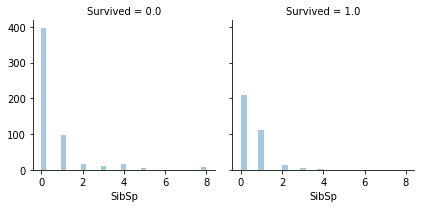

In [574]:
# 兄弟姊妹或配偶數量與生存率的關係
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


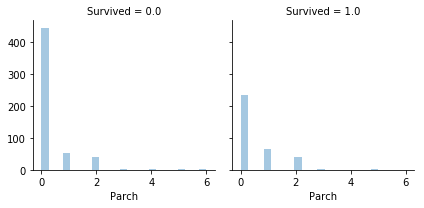

In [575]:
# 父母或小孩數量與生存率的關係
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


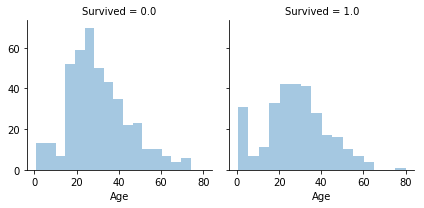

In [576]:
# 年齡與生存率的關係
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


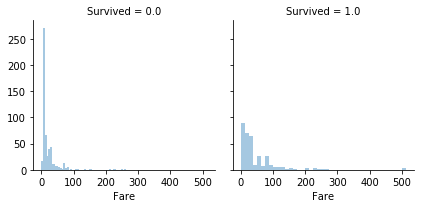

In [577]:
# 票價與生存率的關係
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

In [578]:
#檢視每列資料型別以及nan情況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [579]:
#檢視連續數值屬性基本統計情況
data.describe()

Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000

In [580]:
#檢視object屬性資料統計情況
data.describe(include=['O'])

Cabin Embarked              Name   Sex    Ticket
count           295     1307              1309  1309      1309
unique          186        3              1307     2       929
top     C23 C25 C27        S  Kelly, Mr. James  male  CA. 2343
freq              6      914                 2   843        11

In [581]:
data.mean()

Age             29.881138
Fare            33.295479
Parch            0.385027
PassengerId    655.000000
Pclass           2.294882
SibSp            0.498854
Survived         0.383838
dtype: float64

# Step2.資料預處理

## 標準化

#### Sex 性別（男 1, 女 0）

In [582]:
data = data.replace('male', 1)
data = data.replace('female', 0)
data.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket  
0       3    1      1       0.0         A/5 21171  
1       1    0      1       1.0          PC 17599  
2       3    0      0       1.0  STON/O2. 3101282  
3       1    0      1       1.0            113803  
4       3    1      0       0.0            373450

## 補值

#### Age 年齡（將NaN替換為Age的平均值）

In [583]:
# 採用平均數填充
data['Age'].fillna(data['Age'].dropna().mean(), inplace=True)

#### 票價 Fare（將NaN替換為Fare的平均值）

In [584]:
# 採用平均數填充
data['Fare'].fillna(data['Fare'].dropna().mean(), inplace=True)

#### 出發的港口 Embarked（將NaN替換成最多的類別）

In [585]:
# 統計Embarked單列各個元素對應的個數
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [586]:
# 採用出現最頻繁的值填充
freq_port = data.Embarked.dropna().mode()[0]
data['Embarked'] = data['Embarked'].fillna(freq_port)

In [587]:
# 替換名稱
data['Embarked'] = data['Embarked'].replace(['S','C','Q'],
         ['ebk_S','ebk_C','ebk_Q'])

## 特徵工程

#### 兄弟姊妹與配偶的數量 SibSp & 父母與小孩的數量 Parch

C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


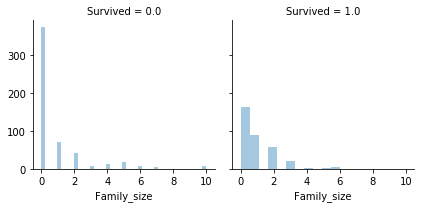

In [588]:
# 製作新的特徵(家庭大小)
data['Family_size'] = data['Parch'] + data['SibSp']

# 家庭大小與生存率的關係
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_size', kde=False)

#### 姓名 Name

In [589]:
# 分割
data['Name'].str.split(", ", expand=True).head(3)

0                                           1
0     Braund                             Mr. Owen Harris
1    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2  Heikkinen                                 Miss. Laina

In [590]:
data['Name'].str.split(", ", expand=True)[0].head(3)

0       Braund
1      Cumings
2    Heikkinen
Name: 0, dtype: object

In [591]:
data['Name'].str.split(", ", expand=True)[1].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: 1, dtype: object

In [592]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [593]:
data['Title1'] = data['Title1'].str.split(". ", expand=True)
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [594]:
# 取出唯一值
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer',
       'Dona'], dtype=object)

In [595]:
# 稱謂與性別的關係
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

In [596]:
# 稱謂與生存率的關係
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

In [597]:
# 稱謂與年齡的關係
data.groupby(['Title1'])['Age'].mean()

Title1
Capt        70.000000
Col         54.000000
Don         40.000000
Dona        39.000000
Dr          41.860142
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       8.682444
Miss        23.333257
Mlle        24.000000
Mme         24.000000
Mr          31.700899
Mrs         36.019242
Ms          28.940569
Rev         41.250000
Sir         49.000000
th          33.000000
Name: Age, dtype: float64

In [598]:
# 稱謂與艙等的關係
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1    Pclass
Capt      1         70.000000
Col       1         54.000000
Don       1         40.000000
Dona      1         39.000000
Dr        1         42.980190
          2         38.500000
Jonkheer  1         38.000000
Lady      1         48.000000
Major     1         48.500000
Master    1          6.984000
          2          2.757273
          3         10.319536
Miss      1         30.331352
          2         21.083646
          3         21.283890
Mlle      1         24.000000
Mme       1         24.000000
Mr        1         39.486105
          2         32.133032
          3         28.793158
Mrs       1         41.478070
          2         33.452384
          3         31.724588
Ms        2         28.000000
          3         29.881138
Rev       2         41.250000
Sir       1         49.000000
th        1         33.000000
Name: Age, dtype: float64

In [599]:
# 合併稱謂
data['Title2'] = data['Title1'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer', 'Dona'],
         ['Mr', 'Mrs', 'Miss', 'Master', 'Mr', 'Mr', 'Other', 'Miss', 'Miss', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs'])

# data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
#          ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [600]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [601]:
# 稱謂與年齡的關係
data.groupby('Title2')['Age'].mean()

Title2
Master     8.682444
Miss      23.383125
Mr        32.048491
Mrs       36.078954
Other     41.860142
Name: Age, dtype: float64

In [602]:
# 稱謂與艙等的關係
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3         10.319536
Miss    1         30.029859
        2         21.219260
        3         21.340825
Mr      1         40.167401
        2         32.594651
        3         28.793158
Mrs     1         41.422642
        2         33.452384
        3         31.724588
Other   1         42.980190
        2         38.500000
Name: Age, dtype: float64

In [603]:
# 稱謂與性別的關係
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

In [604]:
# 稱謂與生存率的關係
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

#### 票號 Ticket

In [605]:
# 取出英文部分，沒有的用X替代
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [606]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

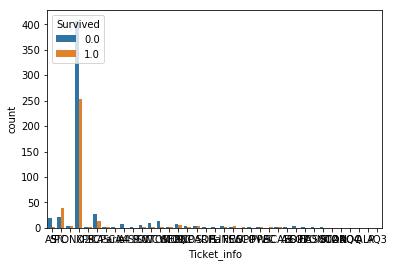

In [607]:
# 票號與生存率的關係
sns.countplot(data['Ticket_info'], hue=data['Survived'])

#### 住艙 Cabin（製作新特徵（甲板））

In [608]:
# 統計Cabin單列各個元素對應的個數
#train['Cabin'].value_counts()

# 取出前面的英文，沒有的用noCabin替代
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'noCabin')

In [609]:
data["Cabin"].unique()

array(['noCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [610]:
data["Cabin"] = data["Cabin"].replace(['noCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'],
         ['cb_noCabin', 'cb_C', 'cb_E', 'cb_G', 'cb_D', 'cb_A', 'cb_B', 'cb_F', 'cb_T'])

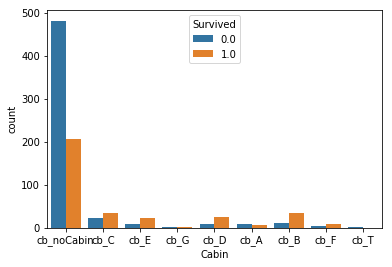

In [611]:
# 艙號與生存率的關係
sns.countplot(data['Cabin'], hue=data['Survived'])

In [612]:
# 屬性列刪除
#train = train.drop(['Cabin'], axis=1)
#test = test.drop(['Cabin'], axis=1)

#train = train.dropna(axis=1, how='any')
#test = test.dropna(axis=1, how='any')

#### Age*Class 製作新特徵

In [613]:
data['Age*Class'] = data['Age']*data['Pclass']

C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


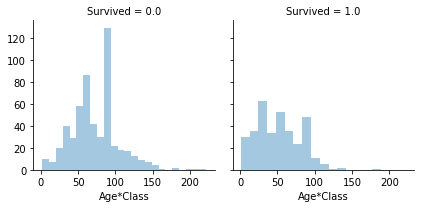

In [614]:
# Age*Class與生存率的關係
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age*Class', kde=False)

In [617]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age                  1309 non-null float64
Cabin                1309 non-null object
Embarked             1309 non-null object
Fare                 1309 non-null float64
Name                 1309 non-null object
Parch                1309 non-null int64
PassengerId          1309 non-null int64
Pclass               1309 non-null int64
Sex                  1309 non-null int64
SibSp                1309 non-null int64
Survived             891 non-null float64
Ticket               1309 non-null object
Family_size          1309 non-null int64
Title1               1309 non-null object
Title2               1309 non-null object
Ticket_info          1309 non-null object
Age*Class            1309 non-null float64
Family_size*class    1309 non-null int64
dtypes: float64(4), int64(7), object(7)
memory usage: 184.2+ KB


## One Hot Encoding

In [618]:
data.head()

Age       Cabin Embarked     Fare  \
0  22.0  cb_noCabin    ebk_S   7.2500   
1  38.0        cb_C    ebk_C  71.2833   
2  26.0  cb_noCabin    ebk_S   7.9250   
3  35.0        cb_C    ebk_S  53.1000   
4  35.0  cb_noCabin    ebk_S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket  Family_size Title1 Title2  \
0       3    1      1       0.0         A/5 21171            1     Mr     Mr   
1       1    0      1       1.0          PC 17599            1    Mrs    Mrs   
2       3    0      0       1.0  STON/O2. 3101282            0   Miss   Miss   
3       1    0      1       1.0            113803            1    Mrs    Mrs   
4       3    1      0       0.0            373450            0     Mr     Mr   

  Ticket_info  Age*Class  Family_size*class  
0          A5       66.0                  3  
1          PC       38.0                  1  
2      STONO2       78.0                  0  
3           X       35.0                  1  
4           X      105.0                  0

In [619]:
# 針對 Embarked 做one-hot encoding
data_Embarked = pd.get_dummies(data['Embarked'])
data_Embarked.head()

ebk_C  ebk_Q  ebk_S
0      0      0      1
1      1      0      0
2      0      0      1
3      0      0      1
4      0      0      1

In [620]:
# 針對稱謂做one-hot encoding
data_Title2 = pd.get_dummies(data['Title2'])
data_Title2.head()

Master  Miss  Mr  Mrs  Other
0       0     0   1    0      0
1       0     0   0    1      0
2       0     1   0    0      0
3       0     0   0    1      0
4       0     0   1    0      0

In [621]:
# 針對艙號做one-hot encoding
data_Cabin = pd.get_dummies(data['Cabin'])
data_Cabin.head()

cb_A  cb_B  cb_C  cb_D  cb_E  cb_F  cb_G  cb_T  cb_noCabin
0     0     0     0     0     0     0     0     0           1
1     0     0     1     0     0     0     0     0           0
2     0     0     0     0     0     0     0     0           1
3     0     0     1     0     0     0     0     0           0
4     0     0     0     0     0     0     0     0           1

In [622]:
# 針對票號做one-hot encoding
data_Ticket_info = pd.get_dummies(data['Ticket_info'])
data_Ticket_info.head()

A  A4  A5  AQ3  AQ4  AS  C  CA  CASOTON  FC ...  SOTONO2  SOTONOQ  SP  \
0  0   0   1    0    0   0  0   0        0   0 ...        0        0   0   
1  0   0   0    0    0   0  0   0        0   0 ...        0        0   0   
2  0   0   0    0    0   0  0   0        0   0 ...        0        0   0   
3  0   0   0    0    0   0  0   0        0   0 ...        0        0   0   
4  0   0   0    0    0   0  0   0        0   0 ...        0        0   0   

   STONO  STONO2  STONOQ  SWPP  WC  WEP  X  
0      0       0       0     0   0    0  0  
1      0       0       0     0   0    0  0  
2      0       1       0     0   0    0  0  
3      0       0       0     0   0    0  1  
4      0       0       0     0   0    0  1  

[5 rows x 37 columns]

In [623]:
# 合併 登船港口
data = pd.merge(data,data_Embarked,left_index=True,right_index=True)  # 把左右二個index相同的dataframe做合併
data.head(3)

Age       Cabin Embarked     Fare  \
0  22.0  cb_noCabin    ebk_S   7.2500   
1  38.0        cb_C    ebk_C  71.2833   
2  26.0  cb_noCabin    ebk_S   7.9250   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   

   Pclass  Sex  SibSp  ...              Ticket Family_size  Title1 Title2  \
0       3    1      1  ...           A/5 21171           1      Mr     Mr   
1       1    0      1  ...            PC 17599           1     Mrs    Mrs   
2       3    0      0  ...    STON/O2. 3101282           0    Miss   Miss   

  Ticket_info Age*Class  Family_size*class  ebk_C  ebk_Q  ebk_S  
0          A5      66.0                  3      0      0      1  
1          PC      38.0                  1      1      0      0  
2      STONO2      78.0                  0      0      0      1  

[3 rows x 21 columns]

In [624]:
# 合併 稱謂
data = pd.merge(data,data_Title2,left_index=True,right_index=True)  # 把左右二個index相同的dataframe做合併
data.head(3)

Age       Cabin Embarked     Fare  \
0  22.0  cb_noCabin    ebk_S   7.2500   
1  38.0        cb_C    ebk_C  71.2833   
2  26.0  cb_noCabin    ebk_S   7.9250   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   

   Pclass  Sex  SibSp  ...    Age*Class Family_size*class  ebk_C ebk_Q ebk_S  \
0       3    1      1  ...         66.0                 3      0     0     1   
1       1    0      1  ...         38.0                 1      1     0     0   
2       3    0      0  ...         78.0                 0      0     0     1   

  Master  Miss  Mr  Mrs  Other  
0      0     0   1    0      0  
1      0     0   0    1      0  
2      0     1   0    0      0  

[3 rows x 26 columns]

In [625]:
# 合併 艙號
data = pd.merge(data,data_Cabin,left_index=True,right_index=True)  # 把左右二個index相同的dataframe做合併
data.head()

Age       Cabin Embarked     Fare  \
0  22.0  cb_noCabin    ebk_S   7.2500   
1  38.0        cb_C    ebk_C  71.2833   
2  26.0  cb_noCabin    ebk_S   7.9250   
3  35.0        cb_C    ebk_S  53.1000   
4  35.0  cb_noCabin    ebk_S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp     ...      Other cb_A  cb_B cb_C cb_D cb_E  cb_F  \
0       3    1      1     ...          0    0     0    0    0    0     0   
1       1    0      1     ...          0    0     0    1    0    0     0   
2       3    0      0     ...          0    0     0    0    0    0     0   
3       1    0      1     ...          0    0     0    1    0    0     0   
4       3    1      0     ...          0    0     0    0    0    0     0   

   cb_G  cb_T  cb_noCabin  
0     0     0           1  
1     0     0           0  
2     0     0           1  
3     0     0           0  
4     0     0           1  

[5 rows x 35 columns]

In [626]:
# 合併 票號
data = pd.merge(data,data_Ticket_info,left_index=True,right_index=True)  # 把左右二個index相同的dataframe做合併
data.head()

Age       Cabin Embarked     Fare  \
0  22.0  cb_noCabin    ebk_S   7.2500   
1  38.0        cb_C    ebk_C  71.2833   
2  26.0  cb_noCabin    ebk_S   7.9250   
3  35.0        cb_C    ebk_S  53.1000   
4  35.0  cb_noCabin    ebk_S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp ...  SOTONO2 SOTONOQ  SP STONO STONO2 STONOQ  SWPP  WC  \
0       3    1      1 ...        0       0   0     0      0      0     0   0   
1       1    0      1 ...        0       0   0     0      0      0     0   0   
2       3    0      0 ...        0       0   0     0      1      0     0   0   
3       1    0      1 ...        0       0   0     0      0      0     0   0   
4       3    1      0 ...        0       0   0     0      0      0     0   0   

   WEP  X  
0    0  0  
1    0  0  
2    0  0  
3    0  1  
4    0  1  

[5 rows x 72 columns]

# Step3.資料探索

In [627]:
# 特徵選擇
X = data[['Pclass', 'Sex', 'Age', 'Family_size', 'Fare', 'ebk_S', 'ebk_C', 'ebk_Q', 'Mr', 'Mrs', 'Miss', 'Master', 'Other', 'cb_noCabin', 'cb_C', 'cb_E', 'cb_G', 'cb_D', 'cb_A', 'cb_B', 'cb_F', 'cb_T', 'Age*Class']]
y = data['Survived']

In [628]:
X.head(3)

Pclass  Sex   Age  Family_size     Fare  ebk_S  ebk_C  ebk_Q  Mr  Mrs  \
0       3    1  22.0            1   7.2500      1      0      0   1    0   
1       1    0  38.0            1  71.2833      0      1      0   0    1   
2       3    0  26.0            0   7.9250      1      0      0   0    0   

         ...          cb_C  cb_E  cb_G  cb_D  cb_A  cb_B  cb_F  cb_T  \
0        ...             0     0     0     0     0     0     0     0   
1        ...             1     0     0     0     0     0     0     0   
2        ...             0     0     0     0     0     0     0     0   

   Age*Class  Family_size*class  
0       66.0                  3  
1       38.0                  1  
2       78.0                  0  

[3 rows x 24 columns]

#### 切分資料

In [629]:
# 分割 訓練資料 與 測試資料

# 訓練資料 891筆
data_Train_X = X[:891:] 
data_Train_y = y[:891:] 

# 測試資料 (預測結果上繳 Kaggle) 418筆
data_Test_X = X[891::]

In [630]:
# 將訓練資料以7:3再分為訓練與測試資料
from sklearn.model_selection import train_test_split

# 特徵訓練資料 , 特徵測試資料, 生存結果訓練資料 , 生存結果測試資料
X_train, X_test, y_train, y_test = train_test_split(data_Train_X, data_Train_y, test_size = 0.3)

#### 標準化

In [631]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Step4.選擇機器學習演算法（SVM）

In [632]:
# Fitting SVM to the Training set
from sklearn.svm import SVC

# 載入SVM中的SVC，並將kernel設為線性
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [633]:
# 使用訓練資料的測試資料X進行預測
predicted = svm.predict(X_test)
predicted

array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [634]:
# 訓練資料的測試資料y
y_test.values

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [637]:
# 測試資料 分數
svm.score(X_test, y_test)

0.7873134328358209

In [638]:
# 訓練資料 分數
svm.score(X_train, y_train)

0.8475120385232745

# Step5.模型評估與改善（混淆矩陣）

In [482]:
# 視覺化混淆矩陣函式（from scikit-learn官網）
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[151  16]
 [ 22  79]]


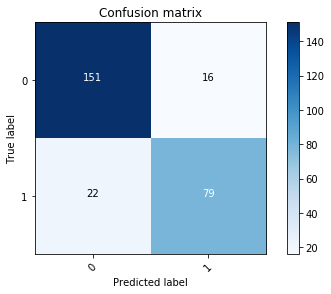

In [483]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics


# Predicting the Test set results
y_pred = svm.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
target_names = [0,1]

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.show()

# 產生上繳資料

In [484]:
submit = data[891::]['PassengerId']

# 重新編號索引
submit.reset_index(inplace=True, drop=True)

submit.head(3)

0    892
1    893
2    894
Name: PassengerId, dtype: int64

In [485]:
# 使用測試資料進行預測
rf_res = svm.predict(data_Test_X)
rf_res

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [486]:
s = pd.Series(rf_res)
type(s)

pandas.core.series.Series

In [487]:
df1 = pd.DataFrame({'PassengerId':submit,'Survived':s}) # DataFrame結構, use dict

In [488]:
df1['Survived'] = df1['Survived'].astype(int)

In [489]:
df1.to_csv('submit.csv', index= False)

In [490]:
df1

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]